# Linear Regression Project

Project Overview:

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Overview

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

--> Avg. Session Length: Average session of in-store style advice sessions.

--> Time on App: Average time spent on App in minutes

--> Time on Website: Average time spent on Website in minutes

--> Length of Membership: How many years the customer has been a member.

In [2]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis (EDA)

Correlation of Time on Website and Yearly Amount Spent

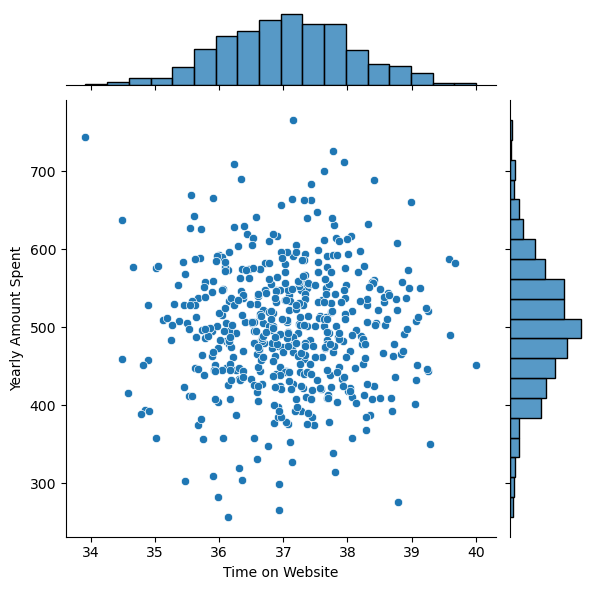

In [5]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='scatter')

Correlation of Time on App and Yearly Amount Spent

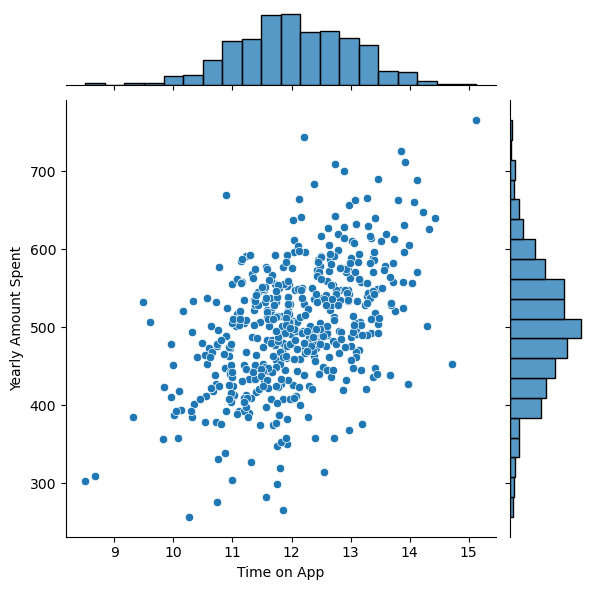

In [6]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,kind='scatter')

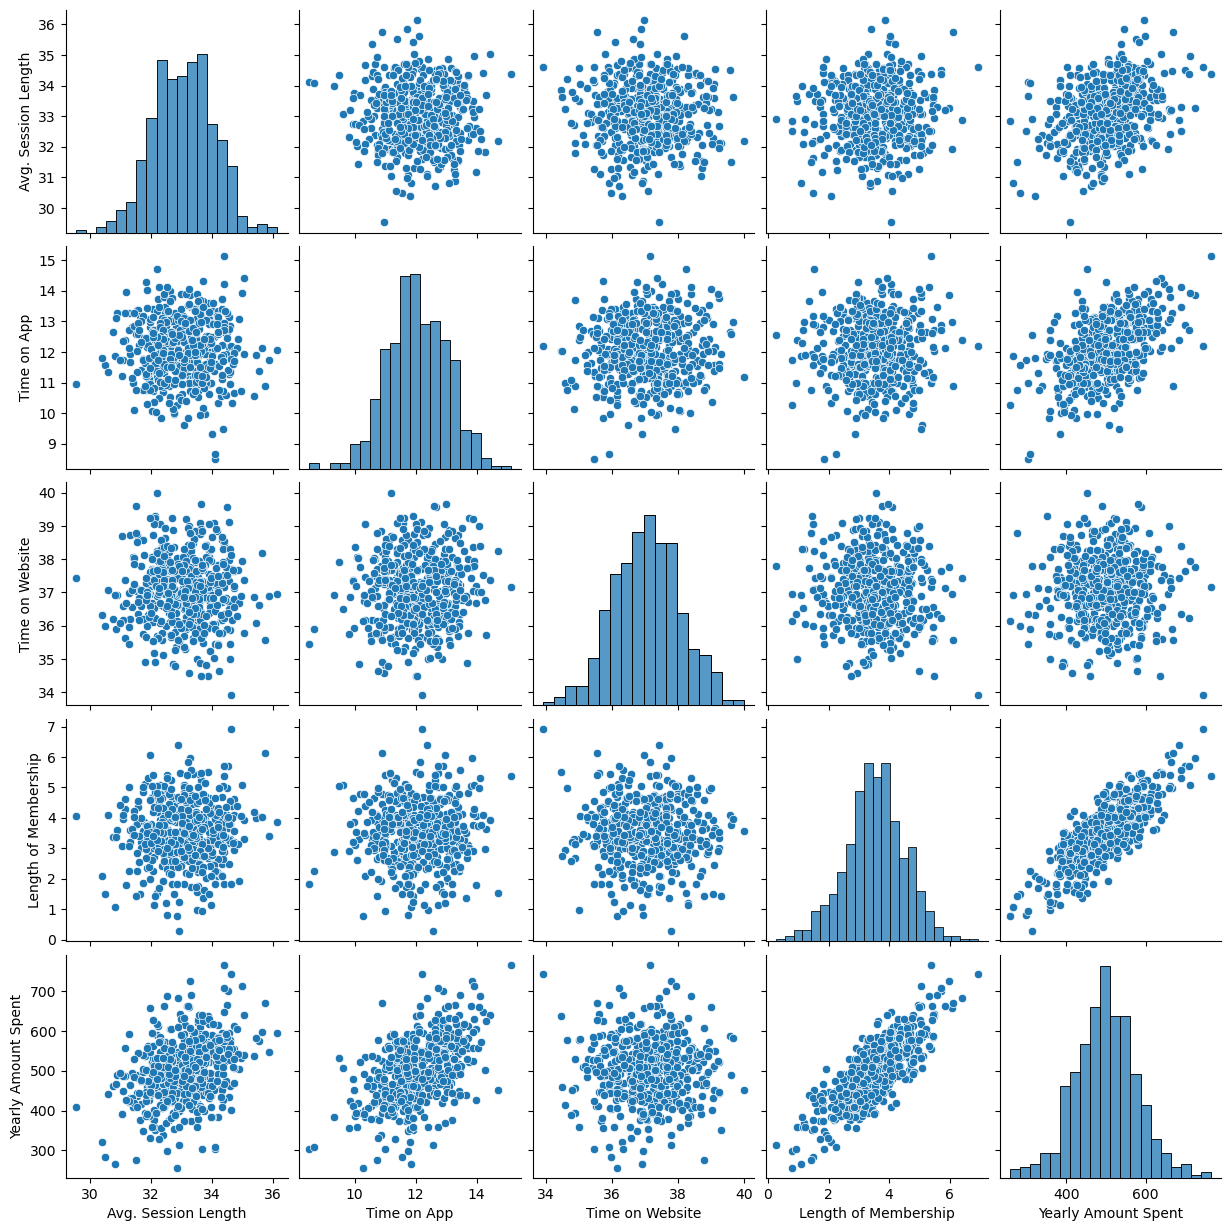

In [12]:
sns.pairplot(data=df)

According to above plot, If we see 'Yearly Amount Spent' and 'Length of Membership' relationship plot. Then, we observe that it is highly correlated and it could be good fit for ML model.

Let's check the regression line for 'Yearly Amount Spent' and 'Length of Membership' feature.

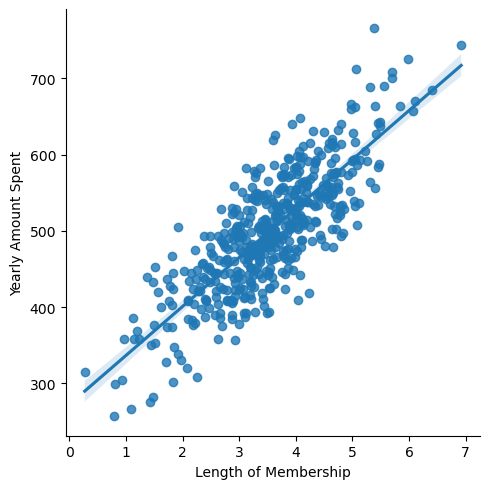

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

# Machine Learning Model

-->> Training and Testing Data

In [14]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

print('X Train: ',X_train.shape)
print('X Test: ',X_test.shape)
print('Y Train: ',y_train.shape)
print('Y Test: ',y_test.shape)

X Train:  (350, 4)
X Test:  (150, 4)
Y Train:  (350,)
Y Test:  (150,)


-->> Training the Model

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

-->> Predicting the Model

In [34]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Y Prediction')

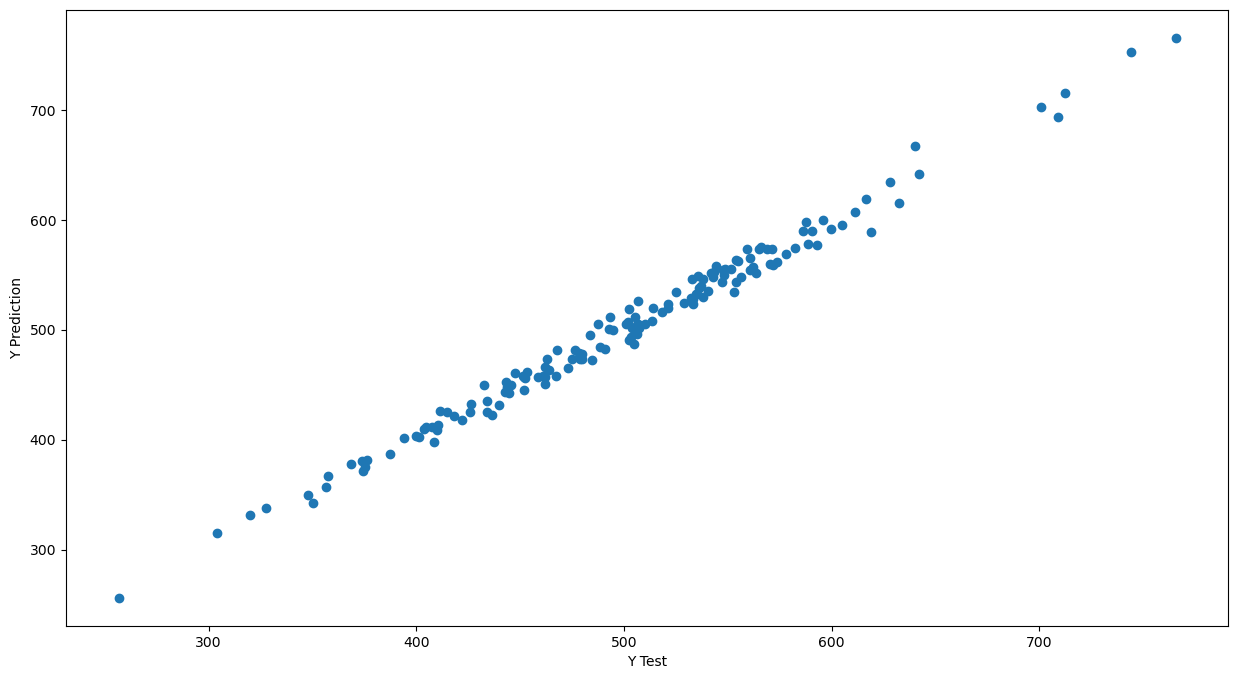

In [35]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')

-->> Evaluating the Model

In [36]:
from sklearn import metrics

print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred)),'\n')
print('Variance Score:')
print('R2: ',metrics.explained_variance_score(y_test,pred))

MAE:  7.228148653430832
MSE:  79.81305165097444
RMSE:  8.933815066978633 

Variance Score:
R2:  0.9890771231889607


-->> Residals

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

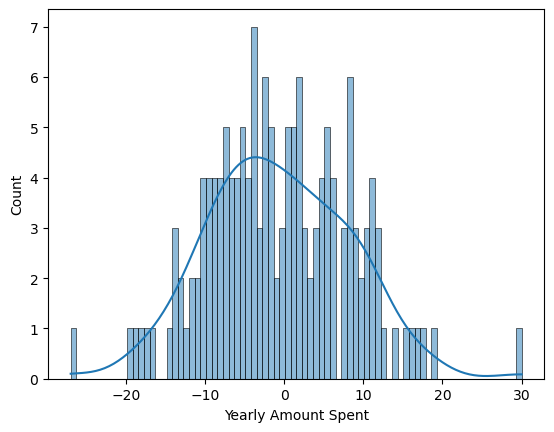

In [37]:
sns.histplot((y_test-pred),bins=80,kde=True)

# Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [38]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficent'])
coef_df

,Coefficent
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

1. Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.

2. Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.

3. Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.

4. Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.

Do you think the company should focus more on their mobile app or on their website?

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!